In [9]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
data_path = "Dataset/heg_sample_data.csv"
heg_meta = pd.read_csv(data_path)

drop_columns = ["days_from_entrance",
                "delta_collect_timestamp_t-t1",
                "delta_collect_timestamp_t1-t2",
                "delta_document.temperatura_t2-t3",
                "delta_document.temperatura_t3-t4",
                "outcome"]

data_x = heg_meta.drop(columns = drop_columns)
data_x.columns = data_x.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

data_y = heg_meta[['outcome']]

### PCA n_components : 3

In [7]:
pca = PCA(n_components=3) 
printcipalComponents = pca.fit_transform(data_x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3'])

print(data_x.shape)
print(data_y.shape)

(13652, 67)
(13652, 1)


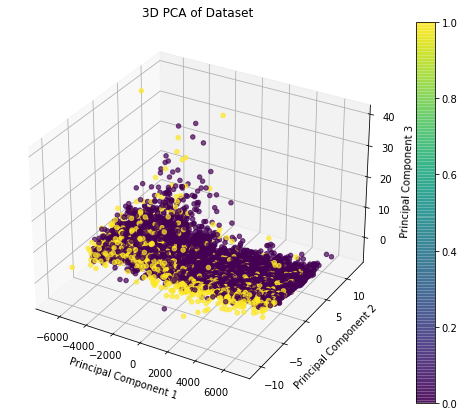

In [11]:
# 결과 시각화 (3D)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    principalDf['principal component1'],
    principalDf['principal component2'],
    principalDf['principal component3'],
    c=data_y, cmap='viridis', alpha=0.7
)

# 축 레이블 설정
ax.set_title('3D PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 컬러바 추가
plt.colorbar(sc)
plt.show()

## PCA n_components : 2

In [13]:
pca = PCA(n_components=2) 
printcipalComponents = pca.fit_transform(data_x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

print(data_x.shape)
print(data_y.shape)

(13652, 67)
(13652, 1)


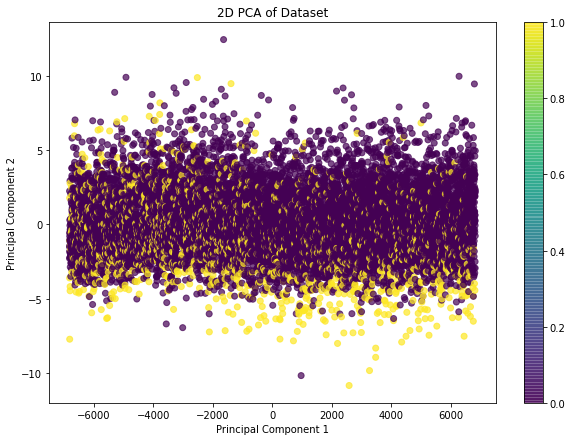

In [15]:
data_y_array = data_y.squeeze() 

# 2D 시각화
plt.figure(figsize=(10, 7))

sc = plt.scatter(
    principalDf['principal component1'],
    principalDf['principal component2'],
    c=data_y_array, cmap='viridis', alpha=0.7
)

# 축 레이블 설정
plt.title('2D PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 컬러바 추가
plt.colorbar(sc)
plt.show()
